# 텐서 초깃값

In [12]:
import torch


x = torch.FloatTensor(
    [
        [-0.6577, -0.5797, 0.6360],
        [0.7392, 0.2145, 1.523],
        [0.2432, 0.5662, 0.322]
    ]
)

# 배치 정규화 수행

In [15]:
import torch
from torch import nn


x = torch.FloatTensor(
    [
        [-0.6577, -0.5797, 0.6360],
        [0.7392, 0.2145, 1.523],
        [0.2432, 0.5662, 0.322]
    ]
)

print(nn.BatchNorm1d(3)(x))

tensor([[-1.3246, -1.3492, -0.3756],
        [ 1.0912,  0.3077,  1.3685],
        [ 0.2334,  1.0415, -0.9930]], grad_fn=<NativeBatchNormBackward0>)


# 가중치 초기화 함수 -1

In [18]:

from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)
        self._init_weights()

    def _init_weights(self):
        nn.init.xavier_uniform_(self.layer[0].weight)
        self.layer[0].bias.data.fill_(0.01)

        nn.init.xavier_uniform_(self.fc.weight)
        self.fc.bias.data.fill_(0.01)


model = Net()

# 가중치 초기화 함수 -2

In [21]:
from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            nn.init.constant_(module.bias, 0.01)
        print(f"Apply : {module}")


model = Net()

Apply : Linear(in_features=1, out_features=2, bias=True)
Apply : Sigmoid()
Apply : Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
)
Apply : Linear(in_features=2, out_features=1, bias=True)
Apply : Net(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): Sigmoid()
  )
  (fc): Linear(in_features=2, out_features=1, bias=True)
)


# 텍스트 데이터 증강 실습

In [77]:
!pip install numpy requests nlpaug transformers sacremoses nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 38.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 19.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.4/436.4 kB 10.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.8/381.8 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.6 MB/s eta 0:00:00a 0:00:01


In [79]:

!pip install numpy requests nlpaug transformers sacremoses nltk
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.ContextualWordEmbsAug(model_path="bert-base-uncased", action="insert")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

src : Those who can imagine anything, can create the impossible.
dst : those who really can imagine practically anything, can create perfectly the seemingly impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : as we now can normally only see for a short distance ahead, but we definitely can already see plenty there that much needs to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : if the a machine intelligence is expected ever to be equally infallible, often it cannot usually also be intelligent.
------------------


In [80]:
import nlpaug.augmenter.char as nac


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = nac.RandomCharAug(action="delete")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Tho who can iain anything, can cret the ipossbl.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can ly see a short isnce hea, but we can see plty the ha needs to be dn.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a machine is excte to be inallle, it cano lo be itllint.
------------------


In [83]:
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.RandomWordAug(action="swap")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Those can imagine anything who, can create the. impossible
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : Can we see only a distance short ahead, but we can plenty there see needs that to done be.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : A if machine is to expected be, infallible it also be cannot intelligent.
------------------


In [85]:
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.SynonymAug(aug_src='wordnet')
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

[nltk_data] Downloading package wordnet to /Users/lyra8/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/lyra8/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lyra8/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


src : Those who can imagine anything, can create the impossible.
dst : Those who fundament think anything, bathroom create the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can just visualise a poor distance forward, simply we can see plenty there that need to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a simple machine equal expected to live infallible, it cannot also be intelligent.
------------------


In [87]:
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]
reserved_tokens = [
    ["can", "can't", "cannot", "could"],
]

reserved_aug = naw.ReservedAug(reserved_tokens=reserved_tokens)
augmented_texts = reserved_aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Those who could imagine anything, cannot create the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We cannot only see a short distance ahead, but we can't see plenty there that needs to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a machine is expected to be infallible, it can also be intelligent.
------------------


In [ ]:

import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

back_translation = naw.BackTranslationAug(
    from_model_name='facebook/wmt19-en-de', 
    to_model_name='facebook/wmt19-de-en'
)
augmented_texts = back_translation.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-en-de and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# 이미지 데이터 증강 실습

In [49]:
!pip install imgaug

In [51]:
from matplotlib import pyplot as plt

torch.Size([3, 512, 512])


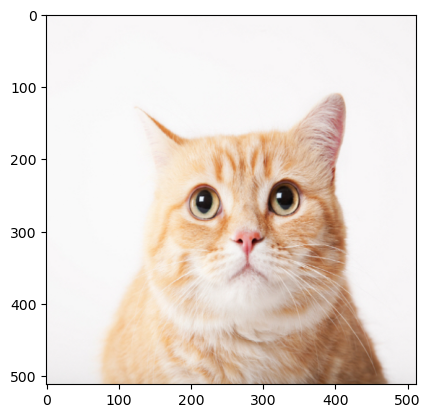

In [59]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512)),
        transforms.ToTensor()
    ]
)

image = Image.open("../practice/cat.jpg")
transformed_image = transform(image)
print(transformed_image.shape)

# 차원 변환: (C, H, W) -> (H, W, C)
transformed_image = transformed_image.permute(1, 2, 0)

# 이미지를 시각화
plt.imshow(transformed_image)
plt.show()

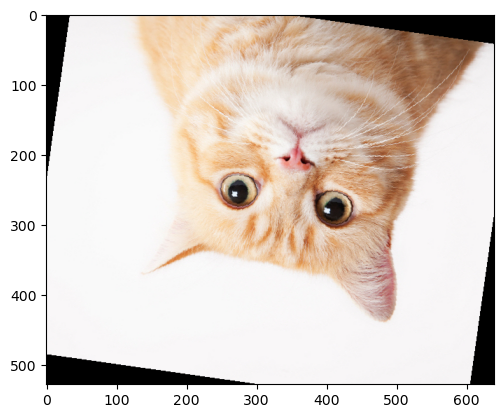

In [61]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.RandomRotation(degrees=30, expand=False, center=None),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5)
    ]
)

image = Image.open("../practice/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

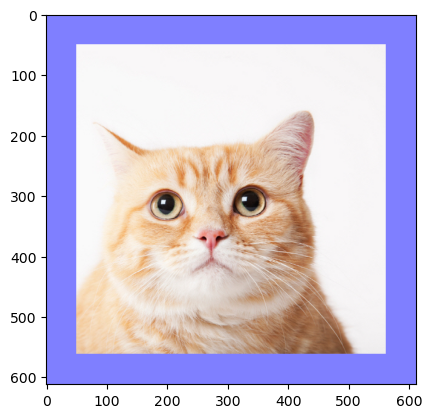

In [63]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.RandomCrop(size=(512, 512)),
        transforms.Pad(padding=50, fill=(127, 127, 255), padding_mode="constant")
    ]
)

image = Image.open("../practice/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

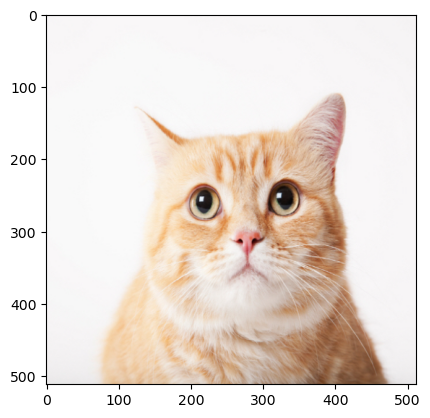

In [65]:

from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512))
    ]
)

image = Image.open("../practice/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

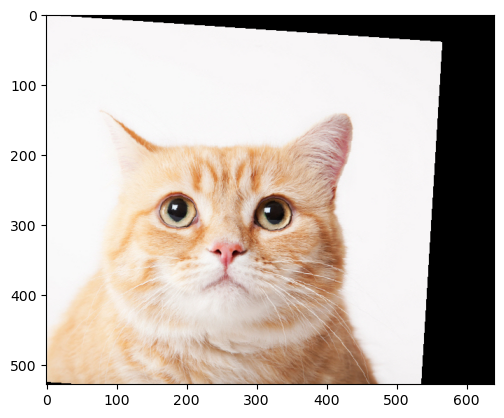

In [67]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.RandomAffine(
            degrees=15, translate=(0.2, 0.2),
            scale=(0.8, 1.2), shear=15
        )
    ]
)

image = Image.open("../practice/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

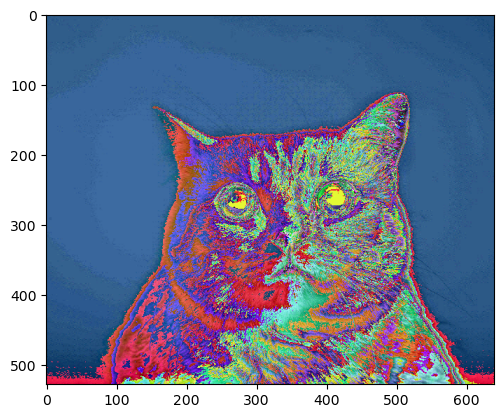

In [69]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.ColorJitter(
            brightness=0.3, contrast=0.3,
            saturation=0.3, hue=0.3
        ),
        transforms.ToTensor(),
        transforms.Normalize(
            mean = [0.485, 0.456, 0.406],
            std = [0.229, 0.224, 0.225]
        ),
        transforms.ToPILImage()
    ]
)

image = Image.open("../practice/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

(528, 640, 3) uint8


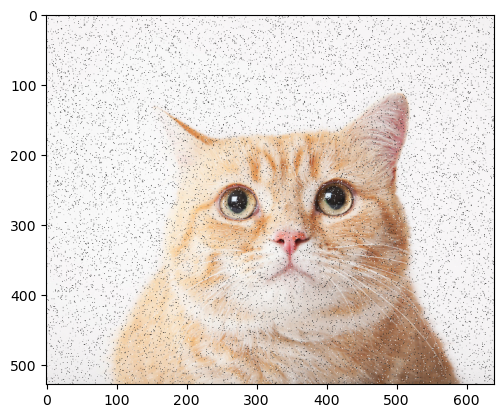

In [71]:
import numpy as np
np.bool = np.bool_ # Deprecated 오류 방지
from PIL import Image
from torchvision import transforms
from imgaug import augmenters as iaa


class IaaTransforms:
    def __init__(self):
        self.seq = iaa.Sequential([
            iaa.SaltAndPepper(p=(0.03, 0.07)),
            iaa.Rain(speed=(0.3, 0.7))
        ])
    
    def __call__(self, images): 
        images = np.array(images)
        print(images.shape, images.dtype)
        augmented = self.seq.augment_image(images)
        return Image.fromarray(augmented)


transform = transforms.Compose([
    IaaTransforms()
])

image = Image.open("../practice/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

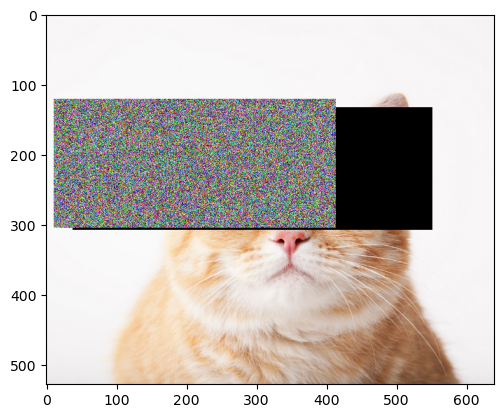

In [73]:

from PIL import Image
from torchvision import transforms


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=1.0, value=0),
    transforms.RandomErasing(p=1.0, value='random'),
    transforms.ToPILImage()
])

image = Image.open("../practice/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

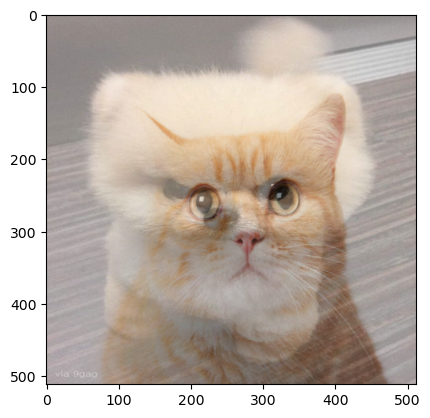

In [75]:
import numpy as np
from PIL import Image
from torchvision import transforms


class Mixup:
    def __init__(self, target, scale, alpha=0.5, beta=0.5):
        self.target = target
        self.scale = scale
        self.alpha = alpha
        self.beta = beta

    def __call__(self, image):
        image = np.array(image)
        target = self.target.resize(self.scale)
        target = np.array(target)
        mix_image = image * self.alpha + target * self.beta
        return Image.fromarray(mix_image.astype(np.uint8))


transform = transforms.Compose(
    [
        transforms.Resize((512, 512)),
        Mixup(
            target=Image.open("../practice/dog.jpg"),
            scale=(512, 512),
            alpha=0.5,
            beta=0.5
        )
    ]
)

image = Image.open("../practice/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)